In [5]:
import model_functions as fn
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from PIL import Image
from sklearn.preprocessing import normalize
import math

In [2]:
stimulus_duration = 1000
sigma_i = 0.25
sigma_s = 0.25
tau = 200 #ms
dt = tau/40 #ms
mu = 0.2
stimulus_duration = 1000
frames_duration = dt
alfa = 1

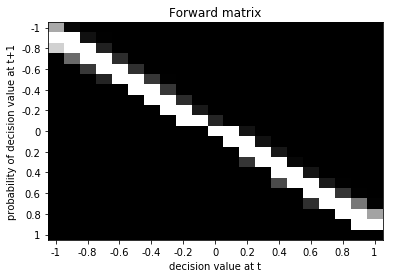

In [3]:
# The boundary for the forward matrix (since the atractors are approximately at 0.75 and -0.65)
L = 1
# Steps of 0.1 will be used
forward_matrix = np.zeros((int(10*(L+L)+1),int(10*(L+L))+1))

y = 0
for x in np.arange(-L,L+0.1,0.1): 
    # The mean of the distribution will be computed
    mean = x-(dt/tau)*(-mu-alfa*x*2+4*x**3)
    # The standard deviation of the distribution will be computed
    stdr_dev = np.sqrt(dt/tau)*np.sqrt(sigma_i**2+sigma_s**2)
    # Normal distribution with mean and standard deviation set (1000 samples)
    x_computed = np.random.normal(mean, stdr_dev, 1000)
    
    # For the limits of the matrix if the decision variable is out of the bounds it will be set inside the bounds.
    x_list = []
    for item in x_computed:
        if item >= L:
            x_list.append(L)
        elif item <= -L:
            x_list.append(-L)
        else:
            x_list.append(item)
    
    # The distribution will be divided into 100 bins
    values, base = np.histogram(x_list, bins=100)
    # The cumulative distribution will be computed
    cumulative = np.cumsum(values)
    
    # The separation numbers of the bins will be truncated to only one decimal
    base_t = []
    for number in base:
        stepper = 10.0
        base_t.append(math.trunc(stepper*number) / stepper)
    index = 0
    
    # The cumulative distribution will be divided into bins separated by 0.1 steps and stored into the matrix
    for i in range(len(base_t)-1):
        if base_t[i+1] != base_t[i]:
            if index == 0:
                forward_matrix[int(base_t[i]*10+L*10)][y] = cumulative[i]
            else:
                forward_matrix[int(base_t[i]*10+L*10)][y] = cumulative[i]-cumulative[index]
            index = i
    y += 1 

# The forward matrix will be normalized
#forward_matrix = normalize(forward_matrix, axis=0, norm='l1')

# Plotting the forward matrix
plt.figure()
im = Image.fromarray(forward_matrix)

plt.title ("Forward matrix")
plt.xlabel("decision value at t")
plt.ylabel("probability of decision value at t+1")
positions = [0,2,4,6,8,10,12,14,16,18,20]
labels = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
plt.xticks(positions, labels)
plt.yticks(positions,labels)
plt.imshow(im,aspect = "auto")


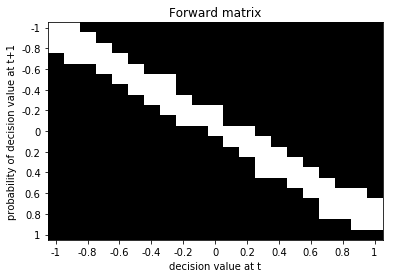

In [4]:
# The boundary for the forward matrix (since the atractors are approximately at 0.75 and -0.65)
L = 1
# Steps of 0.1 will be used
forward_matrix = np.zeros((int(10*(L+L)+1),int(10*(L+L))+1))

y = 0
for x in np.arange(-L,L+0.1,0.1): 
    # The mean of the distribution will be computed
    mean = x-(dt/tau)*(-mu-alfa*x*2+4*x**3)
    # The standard deviation of the distribution will be computed
    stdr_dev = np.sqrt(dt/tau)*np.sqrt(sigma_i**2+sigma_s**2)
    
    # Change it to norm.cdf
    # Normal distribution with mean and standard deviation set (1000 samples)
    x_computed = np.random.normal(mean, stdr_dev, 1000)

    # For the limits of the matrix if the decision variable is out of the bounds it will be set inside the bounds.
    x_list = []
    for item in x_computed:
        if item >= L:
            x_list.append(L)
        elif item <= -L:
            x_list.append(-L)
        else:
            x_list.append(item)

    # The distribution will be divided into 100 bins
    values, base = np.histogram(x_list, bins=100)
    # The cumulative distribution will be computed
    cumulative = np.cumsum(values)

    # The separation numbers of the bins will be truncated to only one decimal
    base_t = []
    for number in base:
        stepper = 10.0
        base_t.append(math.trunc(stepper*number) / stepper)
    index = 0

    # The cumulative distribution will be divided into bins separated by 0.1 steps and stored into the matrix
    for i in range(len(base_t)-1):
        if base_t[i+1] != base_t[i]:
            if index == 0:
                forward_matrix[int(base_t[i]*10+L*10)][y] = cumulative[i]
            else:
                forward_matrix[int(base_t[i]*10+L*10)][y] = cumulative[i]-cumulative[index]
            index = i
    y += 1 

# Not necessary
# The forward matrix will be normalized
#forward_matrix = normalize(forward_matrix, axis=0, norm='l1')

# Plotting the forward matrix
plt.figure()
im = Image.fromarray(forward_matrix*256)

plt.title ("Forward matrix")
plt.xlabel("decision value at t")
plt.ylabel("probability of decision value at t+1")
positions = [0,2,4,6,8,10,12,14,16,18,20]
labels = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
plt.xticks(positions, labels)
plt.yticks(positions,labels)
plt.imshow(im,aspect = "auto")

In [5]:
# The vector with the first decision value will be created:
vector = np.zeros((1,21))[0]
vector[10] = 1

# In this list the different vectors will be stored
final = [vector]
# Each vector will be multiplied by the forward matrix
for i in range(int(stimulus_duration/frames_duration)):
    vector = forward_matrix.dot(vector)
    final.append(vector)
final = np.asarray(final)
final = final.transpose()
#DW(x_value, dt, tau, mu, sigma_i,  sigma_s, alfa, n_trials, stimulus_duration, frames_duration)
trials, stimulus_list =  fn.DW(0, dt, tau, mu, sigma_i,  sigma_s, alfa, 5, stimulus_duration, frames_duration)

im = Image.fromarray(normalize(final)*2000)
fig, ax = plt.subplots(1,1)
img = ax.imshow(im,aspect = "auto")
positions = [0,2,4,6,8,10,12,14,16,18,20]
labels = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
for trial in trials:
    trial.pop()
    trial_new = []
    for i in trial:
        trial_new.append((i+L)*10)
    plt.plot(np.arange(0,len(trial_new),1),trial_new)
plt.yticks(positions, labels)
plt.title("Decision value over time probability")
plt.xlabel("time")
plt.ylabel("decision value")
positions = [200/8*n for n in range(9)]
labels = [1000/8*n for n in range(9)]
plt.xticks(positions, labels)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').